In [145]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/chenwen1226/DAV-5400/master/Tidy.csv', skiprows = [3])
data

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497,221,212,503,"1,841"
1,NaN,delayed,62,12,20,102,305
2,AM WEST,on time,694,"4,840",383,320,201
3,NaN,delayed,117,415,65,129,61


In [146]:
# check the index situation
data.columns = ['Airline','Ontime?','Los Angeles','Phoenix','San Diego','San Francisco','Seattle']

In [147]:
data = data.melt(id_vars = ['Airline','Ontime?'], value_vars = ['Los Angeles','Phoenix','San Diego','San Francisco','Seattle'])
data

,Airline,Ontime?,variable,value
0,ALASKA,on time,Los Angeles,497
1,NaN,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,NaN,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,NaN,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,"4,840"
7,NaN,delayed,Phoenix,415
8,ALASKA,on time,San Diego,212
9,NaN,delayed,San Diego,20


In [148]:
data['Airline'].fillna(method='ffill', inplace = True)
data

,Airline,Ontime?,variable,value
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,"4,840"
7,AM WEST,delayed,Phoenix,415
8,ALASKA,on time,San Diego,212
9,ALASKA,delayed,San Diego,20


In [149]:
# use str.split() to extract separate 3-digit figures from the 'value' column
va = data['value']
va_new = []
for i in range(len(va)):
    if ',' in str(va[i]):
        va_new.append(int(str(va[i]).replace(',','')))
    else:
        va_new.append(int(va[i]))

va_new

[497,
 62,
 694,
 117,
 221,
 12,
 4840,
 415,
 212,
 20,
 383,
 65,
 503,
 102,
 320,
 129,
 1841,
 305,
 201,
 61]

In [150]:
# Add the tidy column named 'va_new' to the dataset
data['va_new']=va_new
# Drop the origin column
data.drop(columns = 'value',inplace = True)

In [151]:
# rename the column names
data.columns = ['Airline','Ontime?','Destination','count']
# show the new dataset as the final tidy dataset
data

,Airline,Ontime?,Destination,count
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,4840
7,AM WEST,delayed,Phoenix,415
8,ALASKA,on time,San Diego,212
9,ALASKA,delayed,San Diego,20


### Perform data analysis to compare arrival delays.
#### 1. Overall on-time arrival performance

In [114]:
#calculate the number of total cases for each airline
total= data.groupby('Airline')['count'].agg('sum') #count the number of the total cases for the two airlines
total

Airline
ALASKA     3775
AM WEST    7225
Name: count, dtype: int64

In [115]:
#calculate the number of on-time cases for each airline.
ontime = data[data['Ontime?']=='on time'].groupby('Airline')['count'].agg('sum')
ontime

Airline
ALASKA     3274
AM WEST    6438
Name: count, dtype: int64

In [118]:
#calculate the on-time arrival ratio of the two airlines
ratio = ontime/total
ratio

Airline
ALASKA     0.867285
AM WEST    0.891073
Name: count, dtype: float64

In [121]:
percent = (ratio['AM WEST']-ratio['ALASKA'])/ratio['ALASKA']
percent

0.02742801098304128

Results:

1> The AM WEST has better overall on-time performance than ALASKA airline.

2> The on-time arrival ratio of AM WEST airline is <b>0.891</b>; The on-time arrival ratio of ALASKA airline is <b>0.867</b>.

3> The on-time arrival ratio of AM WEST airline is <b>2.7%</b> higher than that of ALASKA airline.

#### 2. For each city, which airline performs better on oon-time arrival?

In [122]:
# calculate the number of total cases for each city of the three
total_city = data.groupby('Destination')['count'].agg('sum')
total_city

Destination
Los Angeles      1370
Phoenix          5488
San Diego         680
San Francisco    1054
Seattle          2408
Name: count, dtype: int64

In [123]:
#calculate the number of on-time cases for each city.
ontime_city = data[data['Ontime?']=='on time'].groupby('Destination')['count'].agg('sum')
ontime_city

Destination
Los Angeles      1191
Phoenix          5061
San Diego         595
San Francisco     823
Seattle          2042
Name: count, dtype: int64

In [124]:
#calculate the on-time arrival ratio of the cities
ratio_city = ontime_city/total_city
ratio_city.bar

Destination
Los Angeles      0.869343
Phoenix          0.922194
San Diego        0.875000
San Francisco    0.780835
Seattle          0.848007
Name: count, dtype: float64

Text(0.5, 1.0, 'On-time arrival ratio for 5 cities')

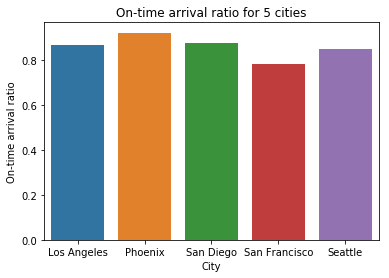

In [130]:
import seaborn as sns 
import matplotlib.pyplot as plt
# Define the type of plot
sns.barplot(ratio_city.index, ratio_city)

# Define labels for x-axis and y-axis 
plt.xlabel('City')
plt.ylabel('On-time arrival ratio')

# Define a title for the plot: gets displayed at the top
plt.title('On-time arrival ratio for 5 cities')

Results:

1> Phoenix has the best arrival performance under the two airlines among the five cities.

2> San Francisco has the worst arrival performance under the two airlines among the five cities.

#### 3. For each city, which airline performs better?

In [141]:
#create a new list containing data['count']
ratio_1 = data['count'] 
#create a list containing the ratios of on-time arrival cases for each airline and city.
ratio_2 = []
for i in range(len(ratio_1)):
    if i%2 == 0:
        ratio_2.append(ratio_1[i]/(ratio_1[i] + ratio_1[i+1]))
    else:
        ratio_2.append(float('Nan')) #assign Nan to the value

ratio_2

[0.889087656529517,
 nan,
 0.8557336621454994,
 nan,
 0.9484978540772532,
 nan,
 0.9210275927687916,
 nan,
 0.9137931034482759,
 nan,
 0.8549107142857143,
 nan,
 0.8314049586776859,
 nan,
 0.7126948775055679,
 nan,
 0.8578751164958062,
 nan,
 0.767175572519084,
 nan]

In [159]:
data_copy = data[['Airline','Destination']] # copy two columns from data to form a new one
data_copy['ratio'] = ratio_2 # add a column containing ratio of on-time arrival
data_copy = data_copy[data_copy.index%2 ==0] # only keep half rows of the whole dataset
data_copy

C:\Users\51759\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Airline,Destination,ratio
0,ALASKA,Los Angeles,0.889088
2,AM WEST,Los Angeles,0.855734
4,ALASKA,Phoenix,0.948498
6,AM WEST,Phoenix,0.921028
8,ALASKA,San Diego,0.913793
10,AM WEST,San Diego,0.854911
12,ALASKA,San Francisco,0.831405
14,AM WEST,San Francisco,0.712695
16,ALASKA,Seattle,0.857875
18,AM WEST,Seattle,0.767176


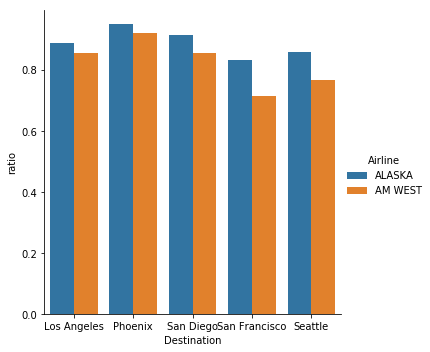

In [161]:
# use seaborn to draw a barchart.
sns.catplot(x='Destination', y='ratio', hue='Airline',
               kind='bar', data=data_copy)

Result:
From the above graph, it is obviousely seen that ALASKA performs better than AM WEST in every city on on-time arrival ratio.

#### 4. Transform the table to the one used for presentation.

In [208]:
data

,Airline,Ontime?,Destination,count
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,4840
7,AM WEST,delayed,Phoenix,415
8,ALASKA,on time,San Diego,212
9,ALASKA,delayed,San Diego,20


In [227]:
# transform the data from long format to wide format
data.pivot_table(index=['Airline','Ontime?'], columns='Destination', values='count')

Destination      Los Angeles  Phoenix  San Diego  San Francisco  Seattle
Airline Ontime?                                                         
ALASKA  delayed           62       12         20            102      305
        on time          497      221        212            503     1841
AM WEST delayed          117      415         65            129       61
        on time          694     4840        383            320      201

I think the original table is the best one to use for presentation. Its size in width is about twice the size in height, which looks more beautiful. Also, all the values are shown in five by four table, which is very clear to look up.